### NBA Logo Design History:
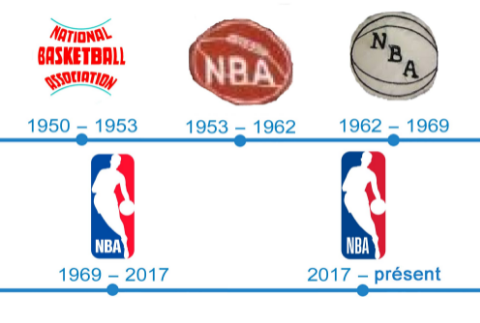

#### Data: The NBA drafting, player, and game data are sourced from stats.nba.com via the nba_api.
#### This is an exploratory data analysis of NBA historic drafting, player, and team data. By the end of the EDA, you will be able to find answers for the following EDA questions I have in mind:

1. How does the NBA drafting count change over time from 1949 to 2020?   
2. What are the top 10 NBA team that drafted most number of player from university?  
3. When did the teams first start to draft players from the universities?  
4. Where are the players coming from? Do most of the players coming from high school, university, or from other professional basketball team?  
5. From 1949 to 2020, how did the total number of participated team count changes and how did the total game count changes along with it overall?  
6. From 1949 to 2020, how did home game game won percentage among all the games change over time?  
7. How does the free throw percentage (FT%) changes over time from 1949 to 2020? For each season, which team had the best FT%?  
8. How does the three point field goal percentage (3P%) changes over time from 1949 to 2020? For each season, which team had the best 3P%?  
9. Who are the top 10 NBA players based on 2020-2021 season salary?  
10. What are the game play stats for the top 10 earning NBA players based on the data available in this table?  
11. What are the top 10 paying teams in 2020-21 season based on the average salary?  

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.express as px
import os

## 0. Connect to SQL database first

In [2]:
# connect to SQL database
db_path = 'basketball.sqlite'
connection = sql.connect(db_path) # create connection object to database
print("SQL database connected")
table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", connection)
print(table)

SQL database connected
                     name
0                  Player
1                    Team
2         Team_Attributes
3            Team_History
4       Player_Attributes
5          Game_Officials
6   Game_Inactive_Players
7             Team_Salary
8           Player_Salary
9                   Draft
10          Draft_Combine
11          Player_Photos
12            Player_Bios
13                   Game
14                   News
15           News_Missing


#### We have 16 tables in this SQLite dataset. Above are the table names you can use.

## 1. Drafting Data Analysis

### 1.1 How does the NBA drafting count change over time from 1949 to 2020?

In [3]:
# get the data needed for visualization with SQL query
query = """
    SELECT 
        yearDraft as year_drafted,
        COUNT(DISTINCT idPlayer) AS total_drafted
    FROM Draft
    GROUP BY yearDraft;
"""
year_draft_total = pd.read_sql(query, connection).astype({"year_drafted": int})
year_draft_total

,year_drafted,total_drafted
0,1949,75
1,1950,121
2,1951,87
3,1952,106
4,1953,122
...,...,...
67,2016,60
68,2017,60
69,2018,60
70,2019,60


In [4]:
px.line(year_draft_total, 
        x="year_drafted", y="total_drafted", 
        title='NBA Drafting Trend from 1949 to 2020')

#### It's quite surprising that NBA has way more drafts in the 70s and 80s comparing the 2000s.   
#### In the year of 1970, there were 239 drafts and there were 228 drafts in the year of 1984 whereas NBA only  
#### drafted around 60 players per year in the recent years.

### 1.2 What are the top 10 NBA team that drafted most number of player from university?

In [5]:
# get the data needed for visualization with SQL query
query = """
    SELECT 
        nameTeam as nba_team,
        COUNT(DISTINCT idPlayer) AS total_drafted
    FROM Draft
    GROUP BY idTeam
    ORDER BY total_drafted DESC
    LIMIT 10;
"""
nba_team_draft_total = pd.read_sql(query, connection)
nba_team_draft_total

,nba_team,total_drafted
0,Atlanta Hawks,514
1,Sacramento Kings,511
2,Philadelphia 76ers,487
3,New York Knicks,474
4,Golden State Warriors,451
5,Boston Celtics,448
6,Detroit Pistons,431
7,Los Angeles Lakers,426
8,Washington Wizards,411
9,Chicago Bulls,341


#### Atlanta Hawks (514), Sacramento Kings (511), Philadelphia 76ers (487) are the top 3 teams that drafted the most number of players over time. 

### 1.3 When did the teams first start to draft players from the universities?

In [6]:
# get the data needed for visualization with SQL query
query = """
    SELECT
        MIN(yearDraft) AS first_draft_year,
        nameTeam AS nba_team,
        COUNT(DISTINCT yearDraft) AS years_drafted,
        COUNT(DISTINCT idPlayer) AS total_drafted_to_date
    FROM Draft
    GROUP BY idTeam
    ORDER BY first_draft_year;
"""
nba_team_first_draft_year = pd.read_sql(query, connection).astype({"first_draft_year": int})
nba_team_first_draft_year.style.background_gradient(subset=['years_drafted','total_drafted_to_date'])

,first_draft_year,nba_team,years_drafted,total_drafted_to_date
0,1949,Baltimore Bullets,6,68
1,1949,Chicago Stags,2,13
2,1949,Indianapolis Olympians,4,36
3,1949,Providence Steamrollers,1,9
4,1949,St. Louis Bombers,1,10
5,1949,Washington Capitols,2,15
6,1949,Boston Celtics,72,448
7,1949,Philadelphia Warriors,69,451
8,1949,Minneapolis Lakers,71,426
9,1949,New York Knicks,69,474


In [7]:
# For each year, how many team first started drafting new players
print("For each year, how many team first started drafting new players?")
nba_team_first_draft_year["first_draft_year"].value_counts()

For each year, how many team first started drafting new players?


1949    12
1977     4
1970     3
1988     2
1989     2
1995     2
1950     2
1967     2
1968     2
2003     1
1961     1
1966     1
1974     1
1980     1
Name: first_draft_year, dtype: int64

In [8]:
nba_team_first_draft_year.drop(["first_draft_year"], axis=1).describe()

,years_drafted,total_drafted_to_date
count,36.000000,36.000000
mean,41.138889,218.444444
std,23.073984,170.582271
min,1.000000,9.000000
25%,27.250000,59.500000
50%,44.000000,176.500000
75%,55.000000,358.500000
max,72.000000,514.000000


#### From the above sumary table, we can observe that most of the teams first started drafting players in 1949-1950 season.  
#### The median years of drafting for the teams are 44 years and the median total drafts to date are 176.5 drafts to date overall.

In [9]:
# top 5 teams with the most years of drafts
nba_team_first_draft_year.sort_values("years_drafted", ascending=False).head(5)

,first_draft_year,nba_team,years_drafted,total_drafted_to_date
6,1949,Boston Celtics,72,448
11,1949,Ft. Wayne Zollner Pistons,72,431
13,1950,Syracuse Nationals,71,487
8,1949,Minneapolis Lakers,71,426
10,1949,Rochester Royals,71,511


In [10]:
# top 5 teams with the most numbers of drafts
nba_team_first_draft_year.sort_values("total_drafted_to_date", ascending=False).head(5)

,first_draft_year,nba_team,years_drafted,total_drafted_to_date
12,1950,Tri-Cities Blackhawks,70,514
10,1949,Rochester Royals,71,511
13,1950,Syracuse Nationals,71,487
9,1949,New York Knicks,69,474
7,1949,Philadelphia Warriors,69,451



#### The two teams that have been drafting players for the most number of years (72 years) are Boston Celtics and Ft. Wayne Zollner Pistons.
#### Tri-Cities Blackhawks is the team that has drafted the most numbers of players to date, which is 514.

### 1.4 Where are the players coming from? Do most of the players coming from high school, university, or from other professional basketball team?

In [11]:
# get the data needed for visualization with SQL query
query = """
    SELECT
        typeOrganizationFrom AS organization,
        COUNT(DISTINCT idPlayer) AS player_count
    FROM Draft
    GROUP BY typeOrganizationFrom;
"""
draft_player_org = pd.read_sql(query, connection)
draft_player_org

,organization,player_count
0,None,15
1,College/University,7389
2,High School,48
3,Other Team/Club,304


In [12]:
# 15 players have unreported organization record. I didn't include them in comparison
px.pie(draft_player_org.iloc[1:,], values='player_count', names='organization', hole=0.3,
       title="Drafted player organization breakdown")

In [13]:
# get the data needed for visualization with SQL query
query = """
    SELECT
        yearDraft AS year_drafted,
        typeOrganizationFrom AS organization,
        COUNT(DISTINCT idPlayer) AS drafted_count
    FROM Draft
    GROUP BY yearDraft, typeOrganizationFrom;
"""
draft_player_org_trend = pd.read_sql(query, connection).astype({"year_drafted": int})
px.line(draft_player_org_trend.dropna(), 
        x="year_drafted", y="drafted_count", color="organization",
        title='NBA drafting trend by player source organization type from 1949 to 2020 (click legend to filter)')

#### Historically speaking, we can see that the majority of the players (95.3%) were been drafted from either College or University.  
#### Very small fraction of the players are drafted from either other baskbetball team/club or high school to play in NBA.  
#### NBA first started to draft from high school in 1962 and NBA first started to draft from other Team/Club in 1970.  
#### If click the "College/University" legend text to deselect it, you will notice the drafting for non-College or non-Univisity players increased slightly after the year of 2000.

## 2. Game Play Data Analysis

### 2.0 From 1949 to 2020, how did the total number of participated team count changes and how did the total game count changes along with it overall?

In [14]:
from plotly.subplots import make_subplots # make subplot for dual axes plot

In [15]:
# get data from SQL database
query = """
    SELECT 
        SEASON_ID-20000 AS season,
        COUNT(DISTINCT TEAM_ID_HOME) AS total_team_count,
        COUNT(DISTINCT GAME_ID) AS total_game_count
    FROM Game
    GROUP BY SEASON_ID
"""
team_and_game_count = pd.read_sql(query, connection)

# # create visualization with two y axis for team and game total from 1946 to 2020
two_y_axis_plot = make_subplots(specs=[[{"secondary_y": True}]])
team_count_trace = px.bar(team_and_game_count, x="season", y="total_team_count")
game_count_trace = px.line(team_and_game_count, x="season", y="total_game_count")
team_count_trace.update_traces(name="team totals", showlegend = True, opacity=0.6)
game_count_trace.update_traces(name="game totals", showlegend = True, line_color="red")
two_y_axis_plot.add_trace(team_count_trace.data[0], secondary_y=False)
two_y_axis_plot.add_trace(game_count_trace.data[0], secondary_y=True)
two_y_axis_plot.update_yaxes(title_text="team totals", secondary_y=False)
two_y_axis_plot.update_yaxes(title_text="game totals", secondary_y=True)
two_y_axis_plot.update_layout(title_text="1946 to 2020: NBA total team and total game play trend (click legend text to filter)")

#### From 1946 to 2020, we can observe that the total game and total team counts increases over the years 0 from 11 teams playing 331 games to 30 teams playing 1080 games in the 2020 season. 

#### 2020-2021 is special: Each team will play 72 regular-season games, which is 10 games fewer than in a typical, 82-game NBA season.

### 2.1 From 1949 to 2020, how did home game game won percentage among all the games change over time?


In [16]:
# get the home game win count 
query = """
    SELECT 
        SEASON_ID-20000 AS season,
        SUM(CASE WL_HOME 
                WHEN'W' THEN 1
                ELSE 0
            END) AS home_win_count
    FROM Game
    GROUP BY SEASON_ID
"""
home_game_stats = pd.read_sql(query, connection)
home_game_stats

,season,home_win_count
0,1946,204
1,1947,111
2,1948,228
3,1949,392
4,1950,265
...,...,...
70,2016,719
71,2017,715
72,2018,729
73,2019,584


Since I have already queried the total game count from previous query, I will use the dataframe I calculated in 2.0 to calculate the percentage of home game won for each season.

In [17]:
# find home game won percentage for each season overall
home_game_stats["home_won_percentage"] = round(100 * home_game_stats["home_win_count"] / team_and_game_count["total_game_count"], 2)
px.line(home_game_stats, y="home_won_percentage", x="season", title="1946-2020: Overall home game won percentage")

#### Overall, the home game won percentage decreased from 75.35% to 51.67% from 1950s to 2020. Let's see how much does th ehome game won percentage varies if we observe it on team level.

In [18]:
# get the home game win count 
# because each row of data represents one game for both home and away team
# I have to union the data to pivot data into a longer format instead of wider format
query = """
    SELECT 
        SEASON_ID-20000 AS season,
        TEAM_ID_HOME AS team_id,
        TEAM_NAME_HOME AS team_name,
        SUM(CASE WL_HOME 
                WHEN'W' THEN 1
                ELSE 0
            END) AS win_count,
        COUNT(TEAM_ID_HOME) AS team_game_count,
        "home" AS game_location
    FROM Game
    GROUP BY SEASON_ID, TEAM_ID_HOME 
    
    UNION
    
    SELECT 
        SEASON_ID-20000 AS season,
        TEAM_ID_AWAY AS team_id,
        TEAM_NAME_AWAY AS team_name,
        SUM(CASE WL_AWAY 
                WHEN'W' THEN 1
                ELSE 0
            END) AS win_count,
        COUNT(TEAM_ID_AWAY) AS team_game_count,
        "away" AS game_location
    FROM Game
    GROUP BY SEASON_ID, TEAM_ID_AWAY
"""
team_level_home_game_stats = pd.read_sql(query, connection)
team_level_home_game_stats["win_percentage"] = round(
    100 * team_level_home_game_stats["win_count"] / team_level_home_game_stats["team_game_count"], 2)
team_level_home_game_stats

,season,team_id,team_name,win_count,team_game_count,game_location,win_percentage
0,1946,1610610025,Chicago Stags,17,30,away,56.67
1,1946,1610610025,Chicago Stags,22,31,home,70.97
2,1946,1610610026,Cleveland Rebels,13,30,away,43.33
3,1946,1610610026,Cleveland Rebels,17,30,home,56.67
4,1946,1610610028,Detroit Falcons,8,30,away,26.67
...,...,...,...,...,...,...,...
3141,2020,1610612764,Washington Wizards,19,36,home,52.78
3142,2020,1610612765,Detroit Pistons,7,37,away,18.92
3143,2020,1610612765,Detroit Pistons,13,36,home,36.11
3144,2020,1610612766,Charlotte Hornets,15,36,away,41.67


In [19]:
# let's compare the home game won percentage and away game won percentage for each year by team
px.scatter(team_level_home_game_stats, x="season", y="win_percentage", 
           color="game_location", title="1946-2020: team level game won percentage by game location")

#### From the above scatter plot, you can observe the red home game won percentages are generally above the blue away game dots. However, there is overplotting issue in visualization. Let's try calculate the median home game won percentage and median away game won percentage and plot it to visualize it.

In [20]:
# calculate median win percentage for each year by game location
cols_to_drop = ["team_id", "team_name", "win_count", "team_game_count"]
median_win_pct = team_level_home_game_stats.drop(cols_to_drop, axis=1).groupby(["season", "game_location"]).median().reset_index()
median_win_pct

,season,game_location,win_percentage
0,1946,away,35.710
1,1946,home,62.070
2,1947,away,48.075
3,1947,home,59.935
4,1948,away,35.575
...,...,...,...
145,2018,home,60.980
146,2019,away,40.540
147,2019,home,54.805
148,2020,away,44.440


In [21]:
px.line(median_win_pct, x="season", y="win_percentage", 
           color="game_location", title="1946-2020: median of the team level game won percentage by game location")

#### With some variation, we can observe that the home game game won percentages have been relatively higher than the away game game won percentage. The areas between the two curves have decreased over the years. The median home game game won percentages have dropped and the median away game game won percentages have increased over the years.

#### Is there any season or any team having away game game won percentages > 50%?

In [22]:
team_level_home_game_stats.query("game_location == 'away' & win_percentage > 50").sort_values("win_percentage")

,season,team_id,team_name,win_count,team_game_count,game_location,win_percentage
2946,2017,1610612757,Portland Trail Blazers,22,43,away,51.16
1720,1997,1610612737,Atlanta Hawks,21,41,away,51.22
2968,2018,1610612738,Boston Celtics,21,41,away,51.22
2952,2017,1610612760,Oklahoma City Thunder,21,41,away,51.22
2372,2008,1610612740,New Orleans Hornets,21,41,away,51.22
...,...,...,...,...,...,...,...
617,1974,1610612738,Boston Celtics,32,41,away,78.05
1610,1995,1610612741,Chicago Bulls,33,41,away,80.49
548,1972,1610612738,Boston Celtics,33,41,away,80.49
526,1971,1610612747,Los Angeles Lakers,33,41,away,80.49


#### Yes, there are. In 2015, Golden State Warrios had the highest away game game won percentage in NBA history (82.93%).

### 2.2 How does the free throw percentage (FT%) changes over time from 1949 to 2020? For each season, which team had the best FT%?

In [23]:
# get the free throw percentage by home and away team
# because each row of data represents one game for both home and away team
# I have to union the data to pivot data into a longer format instead of wider format
query = """
    SELECT 
        SEASON_ID-20000 AS season,
        TEAM_ID_HOME AS team_id,
        TEAM_NAME_HOME AS team_name,
        FT_PCT_HOME AS free_throw_percentage,
        COUNT(TEAM_ID_HOME) AS team_game_count,
        "home" AS game_location
    FROM Game
    GROUP BY SEASON_ID, TEAM_ID_HOME 
    
    UNION
    
    SELECT 
        SEASON_ID-20000 AS season,
        TEAM_ID_AWAY AS team_id,
        TEAM_NAME_AWAY AS team_name,
        FT_PCT_AWAY AS free_throw_percentage,
        COUNT(TEAM_ID_AWAY) AS team_game_count,
        "away" AS game_location
    FROM Game
    GROUP BY SEASON_ID, TEAM_ID_AWAY
"""
team_level_free_throw_stats = pd.read_sql(query, connection)
team_level_free_throw_stats

,season,team_id,team_name,free_throw_percentage,team_game_count,game_location
0,1946,1610610025,Chicago Stags,NaN,30,away
1,1946,1610610025,Chicago Stags,NaN,31,home
2,1946,1610610026,Cleveland Rebels,NaN,30,home
3,1946,1610610026,Cleveland Rebels,0.667,30,away
4,1946,1610610028,Detroit Falcons,NaN,30,home
...,...,...,...,...,...,...
3141,2020,1610612764,Washington Wizards,0.696,36,away
3142,2020,1610612765,Detroit Pistons,0.375,37,away
3143,2020,1610612765,Detroit Pistons,0.719,36,home
3144,2020,1610612766,Charlotte Hornets,0.533,36,away


In [24]:
# how many free_throw_percentage rows have NA values because no free throw records
team_level_free_throw_stats.isna()["free_throw_percentage"].sum()

212

#### I will drop the NA rows and analyze based on the games with free throw records

In [25]:
# drop na and reset index
team_level_free_throw_stats = team_level_free_throw_stats.dropna().query("free_throw_percentage < 1").reset_index(drop=True)

# calculate median free throw percentage for each year by game location
cols_to_drop = ["team_id", "team_name", "team_game_count"]
median_ft_pct = team_level_free_throw_stats.drop(cols_to_drop, axis=1).groupby(["season", "game_location"]).median().reset_index()
px.line(median_ft_pct, x="season", y="free_throw_percentage", 
           color="game_location", title="1946-2020: median of the team level free throw percentage by game location")

#### The FP% starts from 70% and increased over the years to 75% for median NBA season overall FP% among all the games.

### 2.3 How does the three point field goal percentage (3P%) changes over time from 1949 to 2020? For each season, which team had the best 3P%?

In [26]:
# get the free throw percentage by home and away team
# because each row of data represents one game for both home and away team
# I have to union the data to pivot data into a longer format instead of wider format
query = """
    SELECT 
        SEASON_ID-20000 AS season,
        TEAM_ID_HOME AS team_id,
        TEAM_NAME_HOME AS team_name,
        FG3_PCT_HOME AS three_point_percentage,
        COUNT(TEAM_ID_HOME) AS team_game_count,
        "home" AS game_location
    FROM Game
    GROUP BY SEASON_ID, TEAM_ID_HOME 
    
    UNION
    
    SELECT 
        SEASON_ID-20000 AS season,
        TEAM_ID_AWAY AS team_id,
        TEAM_NAME_AWAY AS team_name,
        FG3_PCT_AWAY AS three_point_percentage,
        COUNT(TEAM_ID_AWAY) AS team_game_count,
        "away" AS game_location
    FROM Game
    GROUP BY SEASON_ID, TEAM_ID_AWAY
"""
team_level_three_point_stats = pd.read_sql(query, connection)
team_level_three_point_stats

,season,team_id,team_name,three_point_percentage,team_game_count,game_location
0,1946,1610610025,Chicago Stags,NaN,30,away
1,1946,1610610025,Chicago Stags,NaN,31,home
2,1946,1610610026,Cleveland Rebels,NaN,30,away
3,1946,1610610026,Cleveland Rebels,NaN,30,home
4,1946,1610610028,Detroit Falcons,NaN,30,away
...,...,...,...,...,...,...
3141,2020,1610612764,Washington Wizards,0.481,36,away
3142,2020,1610612765,Detroit Pistons,0.229,37,away
3143,2020,1610612765,Detroit Pistons,0.356,36,home
3144,2020,1610612766,Charlotte Hornets,0.364,36,away


In [27]:
# how many three_point_percentage rows have NA values because no three point data
team_level_three_point_stats.isna()["three_point_percentage"].sum()

1099

In [28]:
# drop na and reset index
team_level_three_point_stats = team_level_three_point_stats.dropna().query("three_point_percentage < 1").reset_index(drop=True)

# calculate median free throw percentage for each year by game location
cols_to_drop = ["team_id", "team_name", "team_game_count"]
median_3p_pct = team_level_three_point_stats.drop(cols_to_drop, axis=1).groupby(["season", "game_location"]).median().reset_index()

#### Due to lack of three points data before 1980s, I will use data after 1986 for comparison.

In [29]:
px.line(median_3p_pct.query("season > 1986"), x="season", y="three_point_percentage", 
           color="game_location", title="1946-2020: median of the team level three points percentage by game location")

#### From the above chart, we can observe that the three points shots are harder to make with about 35% three points field goal percentage in 2020. The 3P% did improve aover the years, but it's still quite hard comparing to 75% free throw percentages in 2020 season.

## 3. Player Background and Salary Analysis

#### 3.1 Who are the top 10 NBA players based on 2020-2021 season salary?

In [30]:
# get the top 10 earning player salary data
query = """
    SELECT 
        namePlayer AS player_name,
        nameTeam AS team_name,
        2021 - strftime('%Y', Player_Attributes.BIRTHDATE) AS age,
        Player_Attributes.DRAFT_YEAR AS draft_year,
        2021 - Player_Attributes.DRAFT_YEAR AS years_in_NBA,
        Player_Attributes.POSITION AS game_position,
        ROUND(value/1000000) AS salary_in_millions
    FROM Player_Salary
    JOIN Player ON
        Player_Salary.namePlayer = Player.full_name
    JOIN Player_Attributes ON
        Player.ID = Player_Attributes.ID
    WHERE slugSeason = '2020-21'
    ORDER BY salary_in_millions DESC
    LIMIT 10;
"""
player_salary_top_10 = pd.read_sql(query, connection)
player_salary_top_10

,player_name,team_name,age,draft_year,years_in_NBA,game_position,salary_in_millions
0,Stephen Curry,Golden State Warriors,33,2009,12,Guard,43.0
1,James Harden,Brooklyn Nets,32,2009,12,Guard,41.0
2,John Wall,Houston Rockets,31,2010,11,Guard,41.0
3,Chris Paul,Phoenix Suns,36,2005,16,Guard,41.0
4,Russell Westbrook,Washington Wizards,33,2008,13,Guard,41.0
5,Kevin Durant,Brooklyn Nets,33,2007,14,Forward,40.0
6,LeBron James,Los Angeles Lakers,37,2003,18,Forward,39.0
7,Klay Thompson,Golden State Warriors,31,2011,10,Guard,35.0
8,Paul George,Los Angeles Clippers,31,2010,11,Forward,35.0
9,Mike Conley,Utah Jazz,34,2007,14,Guard,35.0


#### From the above table results, we can see that Stephen Curry from Golden State Warriors have 2020-21 season salary of 43 Millions. 
#### The top 10 earning NBA players are all in their 30s and have been playing for at least 10 years based on their draft years.
#### Majority of the top 10 earning NBA players are playing Guard position and 3 are playing Forward position.

#### Background of NBA player game positions:
Source: https://jr.nba.com/basketball-positions/  
**Center**:  
The center is the tallest player on each team, playing near the basket. On offense, the center tries to score on close shots and rebound. But on defense, the center tries to block opponents’ shots and rebound their misses.

**Power Forward**:  
The power forward does many of the things a center does, playing near the basket while rebounding and defending taller players. But power forwards also take longer shots than centers.

**Small Forward**:  
The small forward plays against small and large players. They roam all over on the court. Small forwards can score from long shots and close ones.

**Point Guard**:  
The point guard runs the offense and usually is the team’s best dribbler and passer. The point guard defends the opponent’s point guard and tries to steal the ball.

**Shooting Guard**:  
The shooting guard is usually the team’s best shooter. The shooting guard can make shots from long distance and also is a good dribbler.

#### 3.2 What are the game play stats for the top 10 earning NBA players based on the data available in this table?

In [31]:
# get the top 10 earning player salary data
query = """
    SELECT 
        namePlayer AS player_name,
        nameTeam AS team_name,
        Player_Attributes.DRAFT_YEAR AS draft_year,
        Player_Attributes.POSITION AS game_position,
        Player_Attributes.PTS AS points,
        Player_Attributes.AST AS assists,
        Player_Attributes.REB AS rebounds,
        ROUND(value/1000000) AS salary_in_millions
    FROM Player_Salary
    JOIN Player ON
        Player_Salary.namePlayer = Player.full_name
    JOIN Player_Attributes ON
        Player.ID = Player_Attributes.ID
    WHERE slugSeason = '2020-21'
    ORDER BY salary_in_millions DESC
    LIMIT 10;
"""
player_salary_top_10_game_stats = pd.read_sql(query, connection)
player_salary_top_10_game_stats

,player_name,team_name,draft_year,game_position,points,assists,rebounds,salary_in_millions
0,Stephen Curry,Golden State Warriors,2009,Guard,29.0,6.2,5.3,43.0
1,James Harden,Brooklyn Nets,2009,Guard,25.3,11.2,7.9,41.0
2,John Wall,Houston Rockets,2010,Guard,21.1,6.3,3.5,41.0
3,Chris Paul,Phoenix Suns,2005,Guard,15.7,8.8,4.7,41.0
4,Russell Westbrook,Washington Wizards,2008,Guard,21.7,10.3,9.5,41.0
5,Kevin Durant,Brooklyn Nets,2007,Forward,29.0,5.3,7.3,40.0
6,LeBron James,Los Angeles Lakers,2003,Forward,25.4,7.9,7.9,39.0
7,Klay Thompson,Golden State Warriors,2011,Guard,21.5,2.4,3.8,35.0
8,Paul George,Los Angeles Clippers,2010,Forward,22.5,5.5,6.0,35.0
9,Mike Conley,Utah Jazz,2007,Guard,16.4,5.5,3.4,35.0


#### Stephen Curry and Kevin Durant has the highest points (29) average in this dataset.  
#### James Harden and Russel Westbrook have high assists. For rebounds, there aren't that much big difference for the top 10 earning players.

## 4. Team Background Data Analysis

#### 4.1 What are the top 10 paying teams in 2020-21 season based on the average salary?

In [32]:
# get the top 10 team with high median salary by player
query = """
    SELECT 
        nameTeam AS team_name,
        ROUND(AVG(value/1000000), 2) AS avg_salary_in_millions
    FROM Player_Salary
    WHERE slugSeason = '2020-21'
    GROUP BY team_name
    ORDER BY avg_salary_in_millions DESC
    LIMIT 10;
"""
team_top_10_paying = pd.read_sql(query, connection)
fig = px.bar(team_top_10_paying, x="team_name", y="avg_salary_in_millions", 
             text="avg_salary_in_millions", title="top 10 high paying NBA team by average salary")
fig.show()
team_top_10_paying

,team_name,avg_salary_in_millions
0,Golden State Warriors,12.05
1,Los Angeles Clippers,9.76
2,Philadelphia 76ers,9.11
3,Miami Heat,8.79
4,Portland Trail Blazers,8.66
5,Minnesota Timberwolves,8.64
6,Denver Nuggets,8.55
7,Utah Jazz,8.50
8,Brooklyn Nets,8.28
9,New Orleans Pelicans,8.27


#### As we can see, Golden State Warriors is the highest paying team by average player salar in the 2020-21 game season.